# Healthcare Fraud Detection by Provider

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn import metrics
from scipy import stats

In [2]:
Test = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Test-1542969243754.csv")
Test_Beneficiary = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatient = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Test_Inpatientdata-1542969243754.csv")
Test_Outpatient = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Test_Outpatientdata-1542969243754.csv")

Train = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Train-1542865627584.csv")
Train_Beneficiary = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatient = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Train_Inpatientdata-1542865627584.csv")
Train_Outpatient = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Train_Outpatientdata-1542865627584.csv")

**<font size="5">1) Data Exploration </font> <br />
<font size="3"> - The purpose of this exercise is to better understand the data and see what types of analysis is needed. The best step for this is to examine some example rows from the Train and Test datasets.**</font>

In [3]:
Train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [4]:
Train_Beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [5]:
Train_Inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [6]:
Train_Outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


**<font size="5">2) Data Cleanup & Preparation**</font>

In [7]:
# The original Beneficiary data disease indicator columns are broken down by 2 = 'No' and 1 = 'Yes." 
# We should convert them into 0 for our Provider Summary analytics
Train_Beneficiary = Train_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Train_Beneficiary = Train_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiary = Test_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiary = Test_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [8]:
# Create an Age column for the Beneficiary Details
# Lets Create Age column to the dataset
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'] , format='%Y/%m/%d')
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'], format='%Y/%m/%d',errors='ignore')
Train_Beneficiary['Age'] = round(((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB'])/ np.timedelta64(1, 'Y')))

Test_Beneficiary['DOB'] = pd.to_datetime(Test_Beneficiary['DOB'] , format='%Y/%m/%d')
Test_Beneficiary['DOD'] = pd.to_datetime(Test_Beneficiary['DOD'], format='%Y/%m/%d',errors='ignore')
Test_Beneficiary['Age'] = round(((Test_Beneficiary['DOD'] - Test_Beneficiary['DOB'])/ np.timedelta64(1, 'Y')))

In [9]:
# We still need to determine the age of Patients alive at the time of the datapull.
# The best way is to find out the latest claim date and substitute this value in the DOD in the Age = DOD - DOB value
max(Train_Inpatient['ClaimStartDt'])

'2009-12-31'

In [10]:
# We see that the last DOD value is 2009-12-31 ,which means Beneficiary Details data is of year 2009.
# so we will calculate age of other benficiaries for year 2009.
Train_Beneficiary.Age.fillna(round(((pd.to_datetime(max(Train_Inpatient['ClaimStartDt']) , format = '%Y/%m/%d') - Train_Beneficiary['DOB']))/ np.timedelta64(1, 'Y')),
                                 inplace=True)

Test_Beneficiary.Age.fillna(round(((pd.to_datetime(max(Train_Inpatient['ClaimStartDt']) , format = '%Y/%m/%d') - Test_Beneficiary['DOB']))/ np.timedelta64(1, 'Y')),
                                 inplace=True)

In [11]:
Train_Beneficiary.head(5)
Test_Beneficiary.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,67.0
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,0,1,1,0,0,0,1490,160,69.0
2,BENE11010,1936-07-01,NaT,2,1,0,41,30,12,12,...,1,1,1,0,0,0,0,1170,660,74.0
3,BENE11011,1914-03-01,NaT,2,2,0,1,360,12,12,...,1,0,0,1,1,5000,1068,250,320,96.0
4,BENE11014,1938-04-01,NaT,2,1,1,45,780,12,12,...,0,1,0,0,0,21260,2136,120,100,72.0


In [12]:
#Lets create a new variable 'Dead' with flag 1 means Dead and 0 means not Dead
Train_Beneficiary.loc[Train_Beneficiary.DOD.isna(),'Dead']=0
Train_Beneficiary.loc[Train_Beneficiary.DOD.notna(),'Dead']=1

Test_Beneficiary.loc[Test_Beneficiary.DOD.isna(),'Dead']=0
Test_Beneficiary.loc[Test_Beneficiary.DOD.notna(),'Dead']=1

In [13]:
## As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 
Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'] , format='%Y/%m/%d')
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'],format='%Y/%m/%d')
Train_Inpatient['AdmitForDays'] = ((Train_Inpatient['DischargeDt'] - Train_Inpatient['AdmissionDt']).dt.days)+1

Test_Inpatient['AdmissionDt'] = pd.to_datetime(Test_Inpatient['AdmissionDt'] , format='%Y/%m/%d')
Test_Inpatient['DischargeDt'] = pd.to_datetime(Test_Inpatient['DischargeDt'],format='%Y/%m/%d')
Test_Inpatient['AdmitForDays'] = ((Test_Inpatient['DischargeDt'] - Test_Inpatient['AdmissionDt']).dt.days)+1

In [14]:
#We eventually will combine inpatient and outpatient incurance claims, but we still want to make a distinction between the two.
Train_Outpatient['OutPatient'] = 1
Train_Outpatient['InPatient'] = 0
Train_Inpatient['OutPatient'] = 0
Train_Inpatient['InPatient'] = 1

Test_Outpatient['OutPatient'] = 1
Test_Outpatient['InPatient'] = 0
Test_Inpatient['OutPatient'] = 0
Test_Inpatient['InPatient'] = 1

In [15]:
## Combine inpatient and outpatient claims data
Train_Allpatient = Train_Inpatient.append(Train_Outpatient, sort=False)
Test_Allpatient = Test_Inpatient.append(Test_Outpatient, sort=False)

In [16]:
print('Train_Allpatientdata',Train_Allpatient.shape)
print('Test_Allpatientdata',Test_Allpatient.shape)

Train_Allpatientdata (558211, 33)
Test_Allpatientdata (135392, 33)


In [17]:
pd.set_option('display.max_columns', None)
Train_Allpatient.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmitForDays,OutPatient,InPatient
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3.0,0,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,9.0,0,1


In [18]:
#Combine Beneficiary Data with Insurance Claims data
Train_AllPatientDetails = pd.merge(Train_Allpatient, Train_Beneficiary, how='inner', left_on = ['BeneID'], right_on = ['BeneID'])
Test_AllPatientDetails = pd.merge(Test_Allpatient, Test_Beneficiary, how='inner', left_on = ['BeneID'], right_on = ['BeneID'])

In [19]:
##Print shape of data 
print('Shape of All Patient Details Train : ',Train_AllPatientDetails.shape)
print('Shape of All Patient Details Test : ',Test_AllPatientDetails.shape)
Test_AllPatientDetails.head(2)

Shape of All Patient Details Train :  (558211, 59)
Shape of All Patient Details Test :  (135392, 59)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmitForDays,OutPatient,InPatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Dead
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN,8.0,0,1,1938-04-01,NaT,2,1,1,45,780,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,72.0,0.0
1,BENE11014,CLM731858,2009-12-16,2009-12-16,PRV56558,60,PHY331420,PHY331420,PHY428520,NaT,NaN,0.0,NaT,NaN,73721,7224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1938-04-01,NaT,2,1,1,45,780,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,72.0,0.0


In [20]:
# Lets merge patient data with fradulent providers details data with "Provider" code
Train_ProviderWithPatientDetails=pd.merge(Train,Train_AllPatientDetails,on='Provider')
Test_ProviderWithPatientDetails=pd.merge(Test,Test_AllPatientDetails,on='Provider')

In [21]:
Train_ProviderWithPatientDetails.isnull().sum()

Provider                                0
PotentialFraud                          0
BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                

In [22]:
Test_ProviderWithPatientDetails.isnull().sum()

Provider                                0
BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
InscClaimAmtReimbursed                  0
AttendingPhysician                    347
OperatingPhysician                 108199
OtherPhysician                      86760
AdmissionDt                        125841
ClmAdmitDiagnosisCode              100036
DeductibleAmtPaid                     196
DischargeDt                        125841
DiagnosisGroupCode                 125841
ClmDiagnosisCode_1                   2578
ClmDiagnosisCode_2                  47785
ClmDiagnosisCode_3                  76744
ClmDiagnosisCode_4                  95775
ClmDiagnosisCode_5                 108594
ClmDiagnosisCode_6                 115232
ClmDiagnosisCode_7                 119607
ClmDiagnosisCode_8                 122670
ClmDiagnosisCode_9                 125516
ClmDiagnosisCode_10               

In [23]:
#We found that DeductibleAmtPaid and AdmitforDays have NULL values.
#Replace null values with 0. The AdmitforDays is null for outpatients data, so we can replace the value with 0.
Train_ProviderWithPatientDetails['DeductibleAmtPaid'] = Train_ProviderWithPatientDetails.DeductibleAmtPaid.fillna(0)
Train_ProviderWithPatientDetails['AdmitForDays'] = Train_ProviderWithPatientDetails.AdmitForDays.fillna(0)

Test_ProviderWithPatientDetails['DeductibleAmtPaid'] = Test_ProviderWithPatientDetails.DeductibleAmtPaid.fillna(0)
Test_ProviderWithPatientDetails['AdmitForDays'] = Test_ProviderWithPatientDetails.AdmitForDays.fillna(0)

In [24]:
## Lets Print the shape of dataset 
print("Shape of Train Provider with Patient Details data :-",Train_ProviderWithPatientDetails.shape)

print("Shape of Test Provider with Patient Details data :-",Test_ProviderWithPatientDetails.shape)
Test_ProviderWithPatientDetails.head(2)

Shape of Train Provider with Patient Details data :- (558211, 60)
Shape of Test Provider with Patient Details data :- (135392, 59)


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmitForDays,OutPatient,InPatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Dead
0,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,NaT,78060,0.0,NaT,NaN,7840,V4502,2989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,0,1921-02-01,NaT,2,1,0,1,100,0,12,0,1,1,0,1,1,1,1,0,0,0,22000,3204,1020,910,89.0,0.0
1,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70,PHY352340,NaN,NaN,NaT,41401,0.0,NaT,NaN,V4581,V173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,0,1921-02-01,NaT,2,1,0,1,100,0,12,0,1,1,0,1,1,1,1,0,0,0,22000,3204,1020,910,89.0,0.0


In [25]:
# These are currently commented out, but if we are interested in removing outliers, the code is available below
# Remove Train Dataset Outliers that are 4 standard deviations above

#InscClaimAmtReimbursed_outliers = Train_ProviderWithPatientDetails[(np.abs(stats.zscore(Train_ProviderWithPatientDetails['InscClaimAmtReimbursed'])) > 4)].index
#IPAnnualReimbursementAmt_outliers = Train_ProviderWithPatientDetails[(np.abs(stats.zscore(Train_ProviderWithPatientDetails['IPAnnualReimbursementAmt'])) > 4)].index
#IPAnnualDeductibleAmt_outliers = Train_ProviderWithPatientDetails[(np.abs(stats.zscore(Train_ProviderWithPatientDetails['IPAnnualDeductibleAmt'])) > 4)].index
#OPAnnualReimbursementAmt_outliers = Train_ProviderWithPatientDetails[(np.abs(stats.zscore(Train_ProviderWithPatientDetails['OPAnnualReimbursementAmt'])) > 4)].index
#OPAnnualDeductibleAmt_outliers = Train_ProviderWithPatientDetails[(np.abs(stats.zscore(Train_ProviderWithPatientDetails['OPAnnualDeductibleAmt'])) > 4)].index

In [26]:
# Train_ProviderWithPatientDetails.drop(InscClaimAmtReimbursed_outliers, inplace = True, errors='ignore')
# Train_ProviderWithPatientDetails.drop(IPAnnualReimbursementAmt_outliers, inplace = True, errors='ignore')
# Train_ProviderWithPatientDetails.drop(IPAnnualDeductibleAmt_outliers, inplace = True, errors='ignore')
# Train_ProviderWithPatientDetails.drop(OPAnnualReimbursementAmt_outliers, inplace = True, errors='ignore')
# Train_ProviderWithPatientDetails.drop(OPAnnualDeductibleAmt_outliers, inplace = True, errors='ignore')

In [27]:
# Remove Test Dataset Outliers that are 4 standard deviations above
# InscClaimAmtReimbursed_outliers = Test_ProviderWithPatientDetails[(np.abs(stats.zscore(Test_ProviderWithPatientDetails['InscClaimAmtReimbursed'])) > 4)].index
# IPAnnualReimbursementAmt_outliers = Test_ProviderWithPatientDetails[(np.abs(stats.zscore(Test_ProviderWithPatientDetails['IPAnnualReimbursementAmt'])) > 4)].index
# IPAnnualDeductibleAmt_outliers = Test_ProviderWithPatientDetails[(np.abs(stats.zscore(Test_ProviderWithPatientDetails['IPAnnualDeductibleAmt'])) > 4)].index
# OPAnnualReimbursementAmt_outliers = Test_ProviderWithPatientDetails[(np.abs(stats.zscore(Test_ProviderWithPatientDetails['OPAnnualReimbursementAmt'])) > 4)].index
# OPAnnualDeductibleAmt_outliers = Test_ProviderWithPatientDetails[(np.abs(stats.zscore(Test_ProviderWithPatientDetails['OPAnnualDeductibleAmt'])) > 4)].index

In [28]:
# Test_ProviderWithPatientDetails.drop(InscClaimAmtReimbursed_outliers, inplace = True, errors='ignore')
# Test_ProviderWithPatientDetails.drop(IPAnnualReimbursementAmt_outliers, inplace = True, errors='ignore')
# Test_ProviderWithPatientDetails.drop(IPAnnualDeductibleAmt_outliers, inplace = True, errors='ignore')
# Test_ProviderWithPatientDetails.drop(OPAnnualReimbursementAmt_outliers, inplace = True, errors='ignore')
# Test_ProviderWithPatientDetails.drop(OPAnnualDeductibleAmt_outliers, inplace = True, errors='ignore')

In [29]:
## Lets Print the shape of dataset 
#print("Shape of Train Provider with Patient Details data :-",Train_ProviderWithPatientDetails.shape)

#print("Shape of Test Provider with Patient Details data :-",Test_ProviderWithPatientDetails.shape)

**<font size="5">3a) Data Exploration - Overall Analysis**</font>

Percent Distribution of Potential Fraud by Total Claims:- 
 No     61.88
Yes    38.12
Name: PotentialFraud, dtype: float64


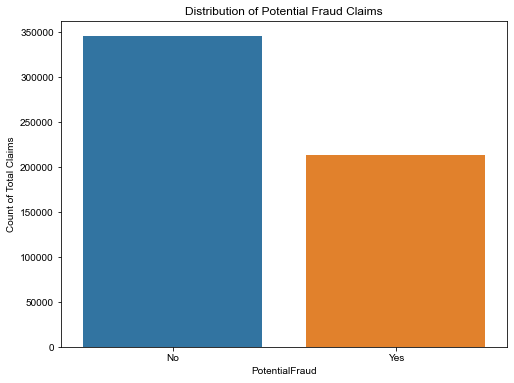

In [30]:
#How many potential fraud claims are happening in total?
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='PotentialFraud', data=Train_ProviderWithPatientDetails)
ax.set_title('Distribution of Potential Fraud Claims')
ax.set_ylabel('Count of Total Claims')

sns.set_style('white',rc={'figure.figsize':(12,8)})
count_total = pd.value_counts(Train_ProviderWithPatientDetails['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud by Total Claims:- \n",round(count_total*100/len(Train_ProviderWithPatientDetails), 2))
LABELS = ["Non Fraud", "Fraud"]

Percent Distribution of Potential Fraud Providers:- 
 No     90.65
Yes     9.35
Name: PotentialFraud, dtype: float64


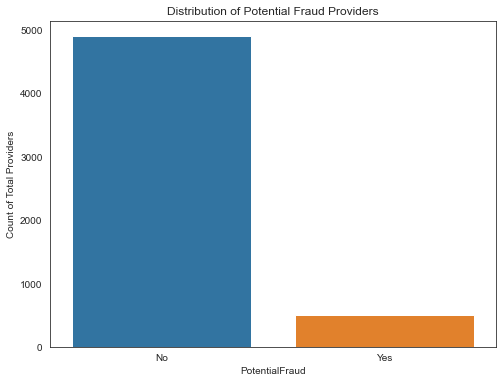

In [31]:
#How many potential fraud providers are there?

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='PotentialFraud', data=Train)
ax.set_title('Distribution of Potential Fraud Providers')
ax.set_ylabel('Count of Total Providers')

sns.set_style('white',rc={'figure.figsize':(12,8)})
count_provider = pd.value_counts(Train['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud Providers:- \n",round(count_provider*100/len(Train), 2))
LABELS = ["Non Fraud", "Fraud"]

Text(0, 0.5, 'Count of Total Claims by Providers')

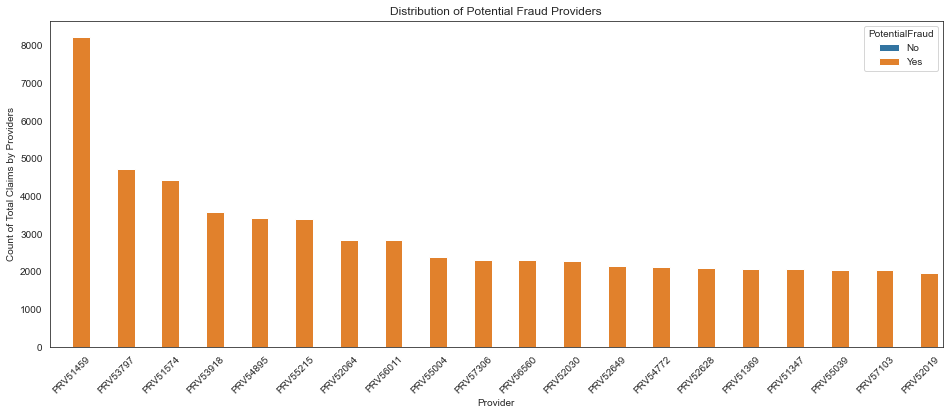

In [32]:
#Top Providers based on Total Number of claims
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x='Provider', hue = 'PotentialFraud',  data=Train_ProviderWithPatientDetails              
              ,order=Train_ProviderWithPatientDetails.Provider.value_counts().iloc[:20].index)
ax.set_title('Distribution of Potential Fraud Providers')
plt.xticks(rotation=45)
ax.set_ylabel('Count of Total Claims by Providers')

Text(0, 0.5, 'Count of Total Claims by Providers')

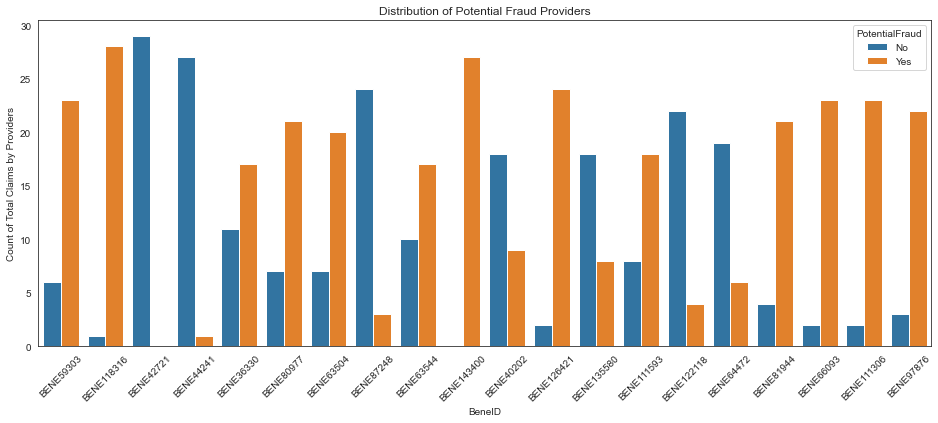

In [33]:
#Top Providers based on Total Number of claims
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x='BeneID', hue = 'PotentialFraud',  data=Train_ProviderWithPatientDetails              
              ,order=Train_ProviderWithPatientDetails.BeneID.value_counts().iloc[:20].index)
ax.set_title('Distribution of Potential Fraud Providers')
plt.xticks(rotation=45)
ax.set_ylabel('Count of Total Claims by Providers')

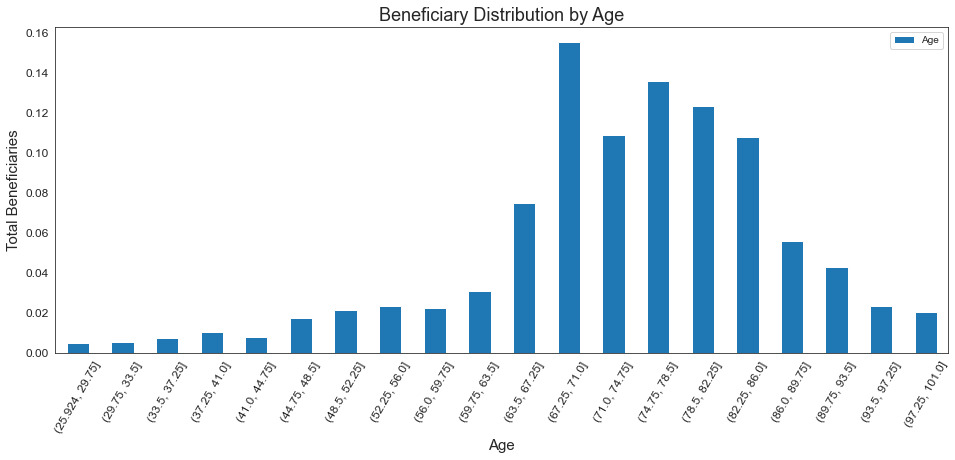

In [34]:
#PLotting the frequencies of beneficiary age of claims
count_Age = pd.value_counts(Train_ProviderWithPatientDetails['Age'],bins = 20)

#Drawing a barplot
grouped_Age = (count_Age / len(Train_ProviderWithPatientDetails['Age'])).to_frame()
grouped_Age = grouped_Age.reset_index()
grouped_Age = grouped_Age.sort_values('index')

grouped_Age.plot(x = 'index', kind = 'bar', rot = 60, figsize=(16, 6), fontsize = 12)

#Giving titles and labels to the plot
plt.title("Beneficiary Distribution by Age",fontsize=18)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Total Beneficiaries",fontsize=15)
plt.show()

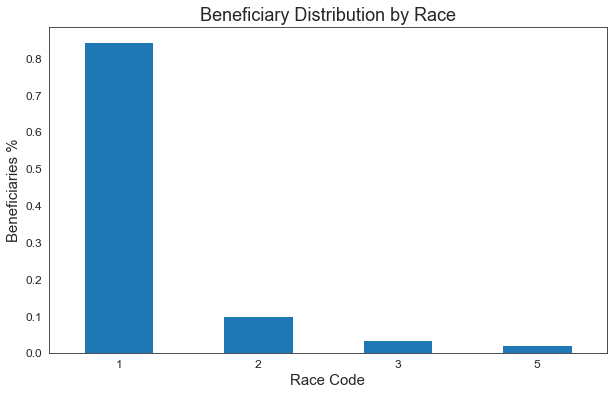

In [35]:
#Plotting the frequencies of beneficiary race of claims
count_Race = pd.value_counts(Train_ProviderWithPatientDetails['Race'], sort = True)

#Drawing a barplot
(count_Race/len(Train_ProviderWithPatientDetails)).plot(kind = 'bar', rot=0,figsize=(10,6),fontsize=12)

#Giving titles and labels to the plot
plt.title("Beneficiary Distribution by Race",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Beneficiaries "'%',fontsize=15)
plt.show()

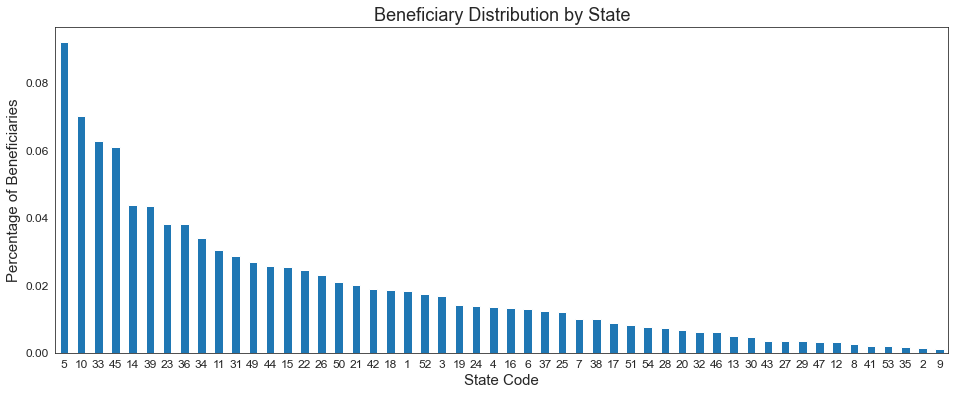

In [36]:
#Plotting the frequencies of beneficiary state of claims
count_State = pd.value_counts(Train_ProviderWithPatientDetails['State'], sort = True)

#Drawing a barplot
(count_State/len(Train_ProviderWithPatientDetails)).plot(kind = 'bar', rot=0,figsize=(16,6),fontsize=12)

#Giving titles and labels to the plot
plt.title("Beneficiary Distribution by State",fontsize=18)
plt.xlabel("State Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries",fontsize=15)
plt.show()

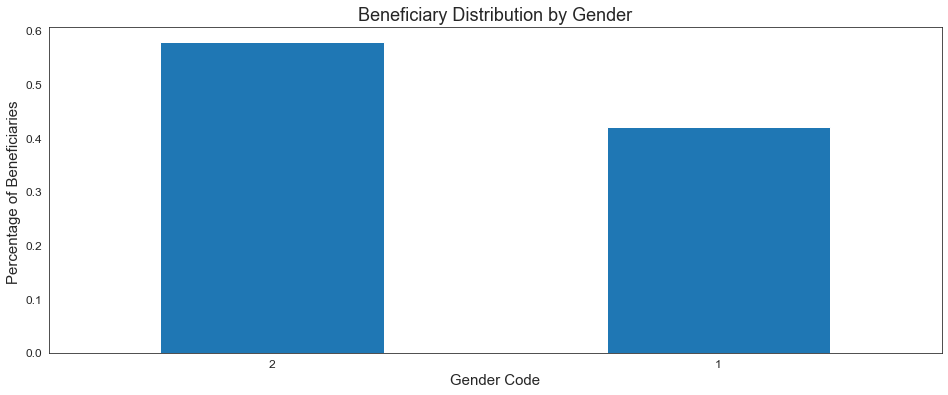

In [37]:
count_Gender = pd.value_counts(Train_ProviderWithPatientDetails['Gender'], sort = True)

## Add Color

#Drawing a barplot
(count_Gender/len(Train_ProviderWithPatientDetails)).plot(kind = 'bar', rot=0,figsize=(16,6),fontsize=12)

#Giving titles and labels to the plot
plt.title("Beneficiary Distribution by Gender",fontsize=18)
plt.xlabel("Gender Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries ",fontsize=15)
plt.show()

Text(0.5, 1.0, 'Top 20 Attending Physicians')

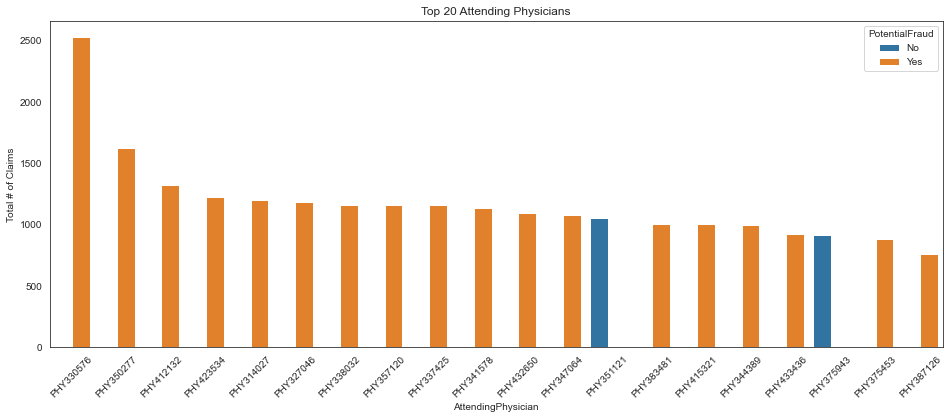

In [38]:
#Plot the Top 20 Attending Physicians
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=Train_ProviderWithPatientDetails
              ,order=Train_ProviderWithPatientDetails.AttendingPhysician.value_counts().iloc[:20].index)
plt.ylabel('Total # of Claims')
plt.xticks(rotation=45)
plt.title("Top 20 Attending Physicians")

## change to vertical barplot for visual

Text(0.5, 1.0, 'Top 20 Providers')

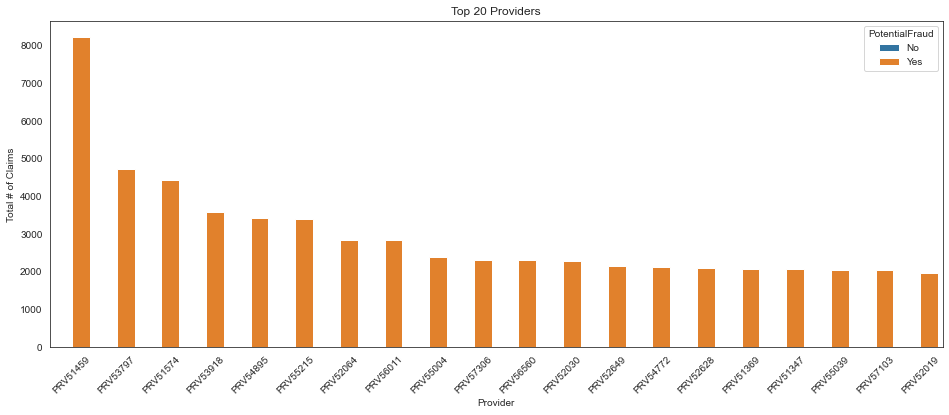

In [39]:
# Plot the Top 20 Providers by Total claims
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='Provider', hue = 'PotentialFraud', data=Train_ProviderWithPatientDetails
              ,order=Train_ProviderWithPatientDetails.Provider.value_counts().iloc[:20].index)
plt.ylabel('Total # of Claims')
plt.xticks(rotation=45)
plt.title("Top 20 Providers")

In [40]:
Train_Fraud = Train_ProviderWithPatientDetails.loc[Train_ProviderWithPatientDetails['PotentialFraud'] == 'Yes']
Train_Valid = Train_ProviderWithPatientDetails.loc[Train_ProviderWithPatientDetails['PotentialFraud'] == 'No']

Text(0.5, 1.0, 'Top 20 Potential Fraud Providers')

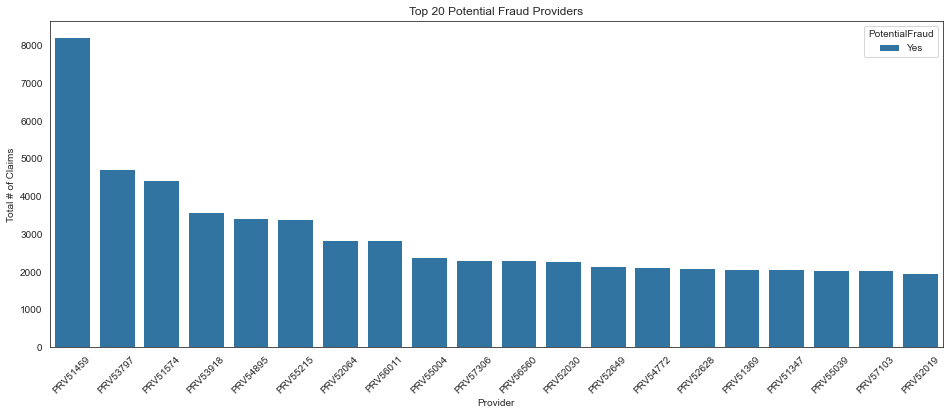

In [41]:
#Plot the Top 20 Potential Fraud Providers by Total claims
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='Provider',hue='PotentialFraud',data=Train_Fraud
              ,order=Train_Fraud.Provider.value_counts().iloc[:20].index)
plt.ylabel('Total # of Claims')
plt.xticks(rotation=45)
plt.title("Top 20 Potential Fraud Providers")

Text(0.5, 1.0, 'Top 20 Non-Fraud Providers')

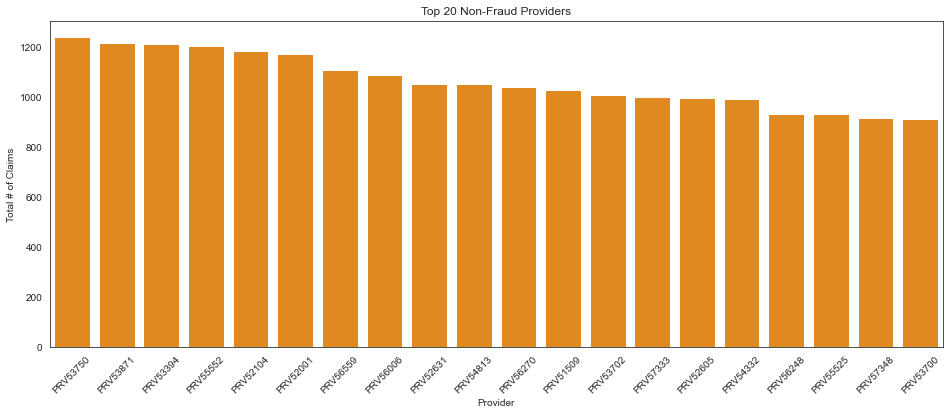

In [42]:
#Plot the Top 20 Valid Providers by Total claims
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='Provider',data=Train_Valid, color = 'darkorange'
              ,order=Train_Valid.Provider.value_counts().iloc[:20].index)
plt.ylabel('Total # of Claims')
plt.xticks(rotation=45)
plt.title("Top 20 Non-Fraud Providers")

**<font size="5">3b) Data Exploration - Procedure Codes and Diagnosis Codes**</font>

In [43]:
#Multiple Procedure codes can be assigned to specific providers, so we combined all Procedure codes into 1 dataframe for comparison
#Combine all Claim Procedure codes and determine the Total Count and Percentage of Procedure codes
Train_Procedures =  pd.DataFrame(columns = ['Procedure_Code'])
Train_Procedures['Procedure_Code'] = pd.concat([Train_ProviderWithPatientDetails['ClmProcedureCode_1'], 
                                                Train_ProviderWithPatientDetails['ClmProcedureCode_2'], 
                                                Train_ProviderWithPatientDetails['ClmProcedureCode_3'], 
                                                Train_ProviderWithPatientDetails['ClmProcedureCode_4'], 
                                                Train_ProviderWithPatientDetails['ClmProcedureCode_5'], 
                                                Train_ProviderWithPatientDetails['ClmProcedureCode_6']], axis=0, sort=True).dropna()

In [44]:
grouped_Train_Procedures = Train_Procedures['Procedure_Code'].value_counts()

In [45]:
grouped_Train_Procedures = grouped_Train_Procedures.to_frame()

In [46]:
grouped_Train_Procedures.columns = ['count']

In [47]:
grouped_Train_Procedures['Procedure_Code'] = grouped_Train_Procedures.index
grouped_Train_Procedures['Percentage'] = (grouped_Train_Procedures['count']/sum(grouped_Train_Procedures['count']))*100
grouped_Train_Procedures['Cum Percentage'] = (grouped_Train_Procedures['count'].cumsum()/sum(grouped_Train_Procedures['count']))*100

In [48]:
#Return Top 20 Procedures Codes
Top_20_grouped_Train_Procedures = grouped_Train_Procedures.sort_values(['count'], ascending=False).head(20)
Top_20_grouped_Train_Procedures

,count,Procedure_Code,Percentage,Cum Percentage
4019.0,1959,4019.0,6.552716,6.552716
9904.0,1152,9904.0,3.853358,10.406074
2724.0,1054,2724.0,3.525555,13.931630
8154.0,1022,8154.0,3.418518,17.350147
66.0,901,66.0,3.013781,20.363928
3893.0,854,3893.0,2.856569,23.220498
3995.0,809,3995.0,2.706048,25.926545
4516.0,651,4516.0,2.177549,28.104094
3722.0,589,3722.0,1.970163,30.074257
8151.0,463,8151.0,1.548702,31.622960


Text(0, 0.5, '% of Total Claims')

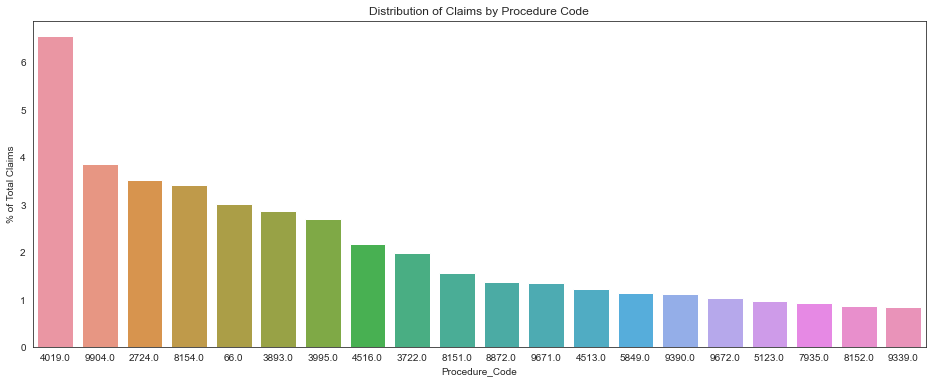

In [49]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Procedure_Code', y = 'Percentage', data=Top_20_grouped_Train_Procedures, 
            order=Top_20_grouped_Train_Procedures.sort_values('Percentage',ascending = False).Procedure_Code)
ax.set_title('Distribution of Claims by Procedure Code')
ax.set_ylabel('% of Total Claims')

In [50]:
#Multiple Diagnosis codes can be assigned to specific providers, so we combined all Diagnosis codes into 1 dataframe for comparison
#Combine all Claim Diagnosis codes and determine the Total Count and Percentage of Diagnosis codes
Train_Diagnosis =  pd.DataFrame(columns = ['Diagnosis_Code'])
Train_Diagnosis['Diagnosis_Code'] = pd.concat([Train_ProviderWithPatientDetails['ClmDiagnosisCode_1'], 
                                               Train_ProviderWithPatientDetails['ClmDiagnosisCode_2'], 
                                               Train_ProviderWithPatientDetails['ClmDiagnosisCode_3'], 
                                               Train_ProviderWithPatientDetails['ClmDiagnosisCode_4'], 
                                               Train_ProviderWithPatientDetails['ClmDiagnosisCode_5'], 
                                               Train_ProviderWithPatientDetails['ClmDiagnosisCode_6'],
                                               Train_ProviderWithPatientDetails['ClmDiagnosisCode_7'],
                                               Train_ProviderWithPatientDetails['ClmDiagnosisCode_8'],
                                               Train_ProviderWithPatientDetails['ClmDiagnosisCode_9'],
                                               Train_ProviderWithPatientDetails['ClmDiagnosisCode_10']], axis=0, sort=True).dropna()

In [51]:
grouped_Train_Diagnosis = Train_Diagnosis['Diagnosis_Code'].value_counts()

In [52]:
grouped_Train_Diagnosis = grouped_Train_Diagnosis.to_frame()

In [53]:
grouped_Train_Diagnosis.columns = ['count']

In [54]:
grouped_Train_Diagnosis['Diagnosis_Code'] = grouped_Train_Diagnosis.index
grouped_Train_Diagnosis['Percentage'] = (grouped_Train_Diagnosis['count']/sum(grouped_Train_Diagnosis['count']))*100
grouped_Train_Diagnosis['Cum Percentage'] = (grouped_Train_Diagnosis['count'].cumsum()/sum(grouped_Train_Diagnosis['count']))*100

In [55]:
#Return Top 20 Procedures Diagnosis codes
Top_20_grouped_Train_Diagnosis = grouped_Train_Diagnosis.head(20)
Top_20_grouped_Train_Diagnosis

,count,Diagnosis_Code,Percentage,Cum Percentage
4019,77056,4019,4.584713,4.584713
25000,37356,25000,2.222624,6.807337
2724,35763,2724,2.127843,8.935180
V5869,24904,V5869,1.481749,10.416929
4011,23773,4011,1.414457,11.831386
42731,20138,42731,1.198180,13.029566
V5861,20001,V5861,1.190029,14.219595
2720,18268,2720,1.086918,15.306512
2449,17600,2449,1.047173,16.353685
4280,15507,4280,0.922642,17.276327


Text(0, 0.5, '% of Total Claims')

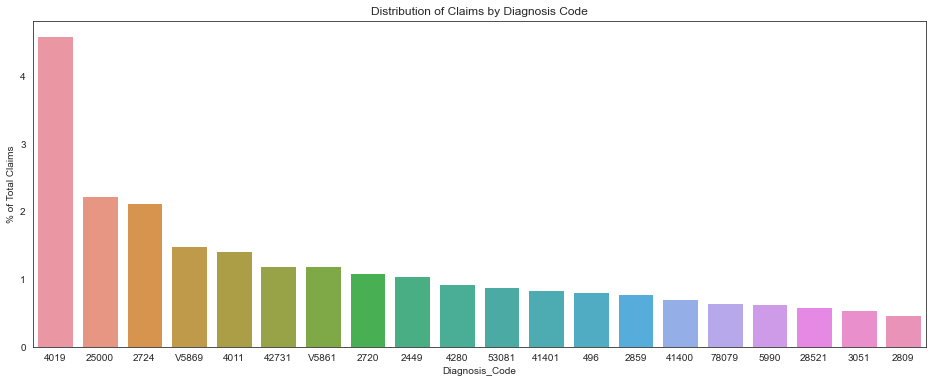

In [56]:
# Plot the Top 20 Diagnosis Codes
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Diagnosis_Code', y = 'Percentage', data=Top_20_grouped_Train_Diagnosis, 
            order=Top_20_grouped_Train_Diagnosis.sort_values('Percentage',ascending = False).Diagnosis_Code)
ax.set_title('Distribution of Claims by Diagnosis Code')
ax.set_ylabel('% of Total Claims')

In [57]:
d = dict(Top_20_grouped_Train_Diagnosis['Diagnosis_Code'])

In [58]:
Train_Diagnosis = pd.merge(Train_Diagnosis, Train_ProviderWithPatientDetails['Provider'], how='outer', right_index = True, left_index = True)

In [59]:
Train_Diagnosis['count'] = 1

In [60]:
Train_Diagnosis_Group = Train_Diagnosis.set_index('Diagnosis_Code').groupby(d)
Train_Diagnosis_Group

**<font size="5">3c) Data Exploration - Compare Deductible and Reimbursement Amounts**</font>

C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


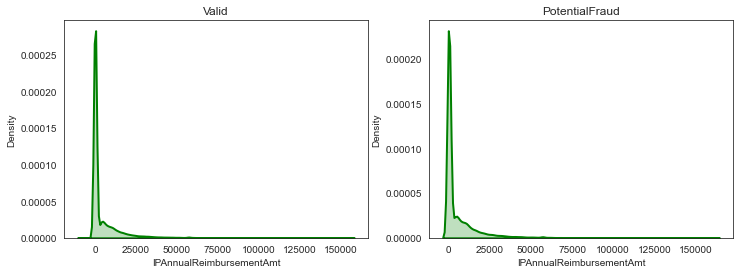

In [61]:
#compare IPAnnualReimbursement Amounts
fig, ax = plt.subplots(1, 2) 
sns.distplot(Train_Valid['IPAnnualReimbursementAmt'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[0]).set_title('Valid') 
sns.distplot(Train_Fraud['IPAnnualReimbursementAmt'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[1]).set_title('PotentialFraud')  
fig.set_figheight(4) 
fig.set_figwidth(12) 

<AxesSubplot:xlabel='PotentialFraud', ylabel='IPAnnualReimbursementAmt'>

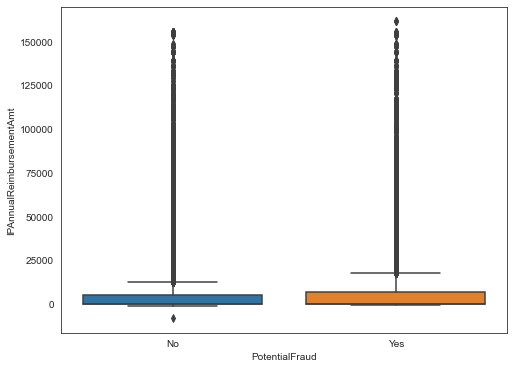

In [62]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='PotentialFraud',y='IPAnnualReimbursementAmt', data=Train_ProviderWithPatientDetails)

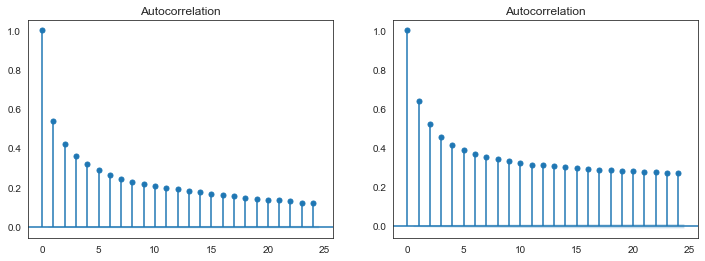

In [63]:
from statsmodels.graphics import tsaplots
# Display the autocorrelation plot of your time series to test the independence of each variable
# The autocorrelation shows that the variable is not independent, so we cannot use the Mann Whitney Test to test the significance of Valid and Potential Fraud Providers
fig, ax = plt.subplots(1, 2) 
tsaplots.plot_acf(Train_Valid['IPAnnualReimbursementAmt'], lags=24, ax = ax[0])
tsaplots.plot_acf(Train_Fraud['IPAnnualReimbursementAmt'], lags=24, ax = ax[1])
fig.set_figheight(4) 
fig.set_figwidth(12) 

In [64]:
# Mann-Whitney U test
#from numpy.random import seed
#from numpy.random import randn
#from scipy.stats import mannwhitneyu
# generate two independent samples
# compare samples
#stat, p = mannwhitneyu(Train_Fraud['IPAnnualReimbursementAmt'], Train_Valid['IPAnnualReimbursementAmt'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha: print('There is no significant difference between the two populations by IPAnnualReimbursementAmt (fail to reject H0)')
#else: print('There is a significant difference between the two populations by IPAnnualReimbursementAmt (reject H0)')

C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


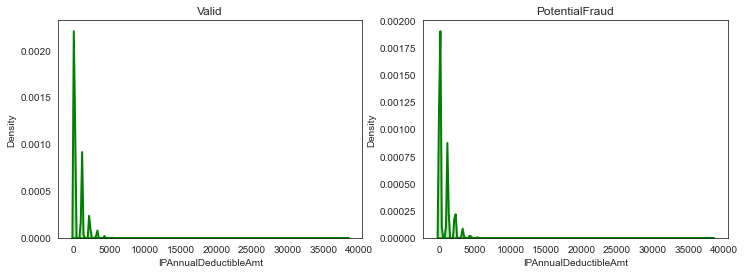

In [65]:
fig, ax = plt.subplots(1, 2) 
sns.distplot(Train_Valid['IPAnnualDeductibleAmt'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]).set_title('Valid') 
sns.distplot(Train_Fraud['IPAnnualDeductibleAmt'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]).set_title('PotentialFraud') 
fig.set_figheight(4) 
fig.set_figwidth(12) 

<AxesSubplot:xlabel='PotentialFraud', ylabel='IPAnnualDeductibleAmt'>

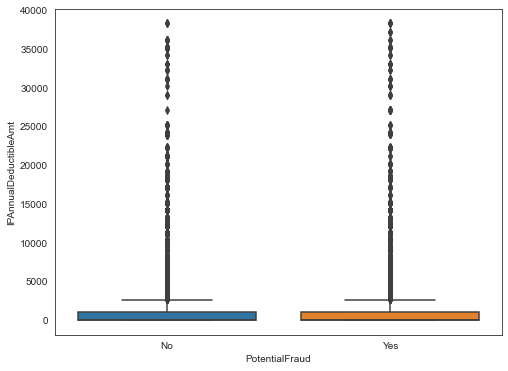

In [66]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='PotentialFraud',y='IPAnnualDeductibleAmt', data=Train_ProviderWithPatientDetails)

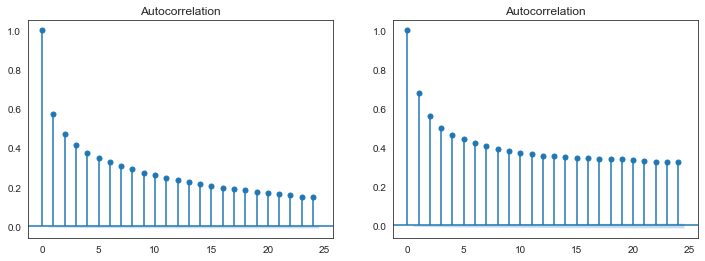

In [67]:
# Display the autocorrelation plot of your time series
# The autocorrelation shows that the variable is not independent, so we cannot use the Mann Whitney Test to test the significance of Valid and Potential Fraud Providers
fig, ax = plt.subplots(1, 2) 
tsaplots.plot_acf(Train_Valid['IPAnnualDeductibleAmt'], lags=24, ax = ax[0])
tsaplots.plot_acf(Train_Fraud['IPAnnualDeductibleAmt'], lags=24, ax = ax[1])
fig.set_figheight(4) 
fig.set_figwidth(12) 

In [68]:
# generate two independent samples
# compare samples
#stat, p = mannwhitneyu(Train_Fraud['IPAnnualDeductibleAmt'], Train_Valid['IPAnnualDeductibleAmt'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha: print('There is no significant difference between the two populations by IPAnnualDeductibleAmt (fail to reject H0)')
#else: print('There is a significant difference between the two populations by IPAnnualDeductibleAmt(reject H0)')

C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


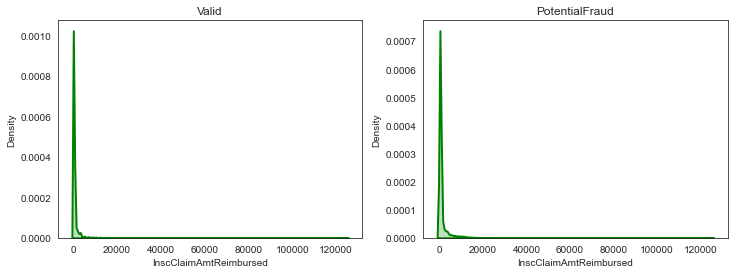

In [69]:
fig, ax = plt.subplots(1, 2) 
sns.distplot(Train_Valid['InscClaimAmtReimbursed'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[0]).set_title('Valid')
sns.distplot(Train_Fraud['InscClaimAmtReimbursed'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[1]).set_title('PotentialFraud')
fig.set_figheight(4) 
fig.set_figwidth(12) 

<AxesSubplot:xlabel='PotentialFraud', ylabel='InscClaimAmtReimbursed'>

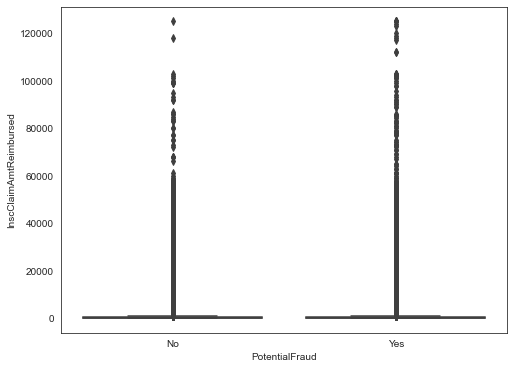

In [70]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='PotentialFraud',y='InscClaimAmtReimbursed', data=Train_ProviderWithPatientDetails)

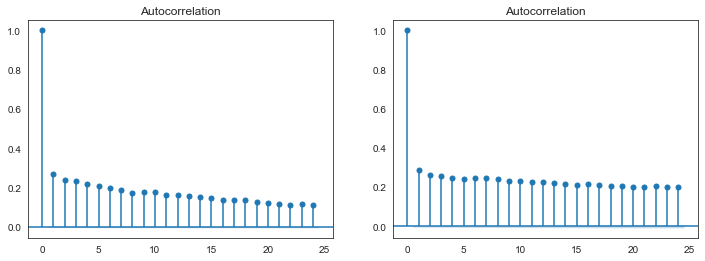

In [71]:
# Display the autocorrelation plot of your time series
# The autocorrelation shows that the variable is not independent, so we cannot use the Mann Whitney Test to test the significance of Valid and Potential Fraud Providers
fig, ax = plt.subplots(1, 2) 
tsaplots.plot_acf(Train_Valid['InscClaimAmtReimbursed'], lags=24, ax = ax[0])
tsaplots.plot_acf(Train_Fraud['InscClaimAmtReimbursed'], lags=24, ax = ax[1])
fig.set_figheight(4) 
fig.set_figwidth(12) 

In [72]:
# generate two independent samples
# compare samples
#stat, p = mannwhitneyu(Train_Fraud['InscClaimAmtReimbursed'], Train_Valid['InscClaimAmtReimbursed'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha: print('There is no significant difference between the two populations by InscClaimAmtReimbursed (fail to reject H0)')
#else: print('There is a significant difference between the two populations by InscClaimAmtReimbursed (reject H0)')

C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


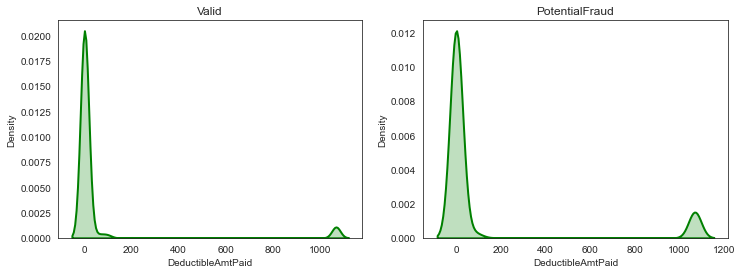

In [73]:
fig, ax = plt.subplots(1, 2) 
sns.distplot(Train_Valid['DeductibleAmtPaid'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[0]).set_title('Valid')
sns.distplot(Train_Fraud['DeductibleAmtPaid'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[1]).set_title('PotentialFraud')
fig.set_figheight(4) 
fig.set_figwidth(12) 

<AxesSubplot:xlabel='PotentialFraud', ylabel='DeductibleAmtPaid'>

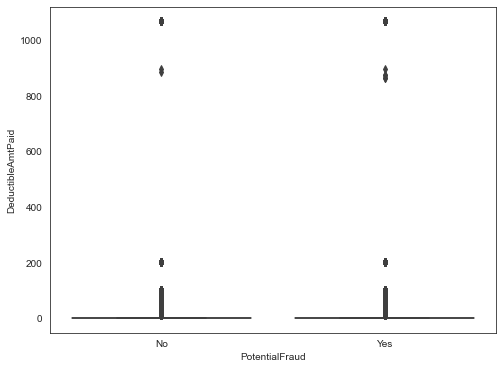

In [74]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='PotentialFraud',y='DeductibleAmtPaid', data=Train_ProviderWithPatientDetails)

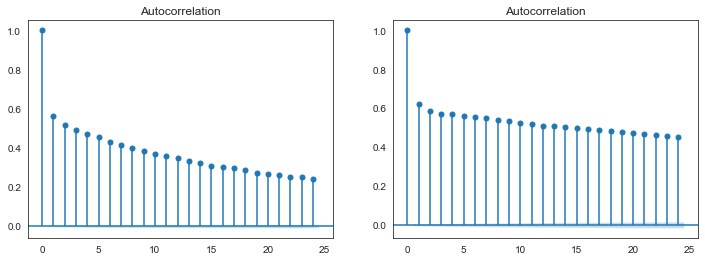

In [75]:
# Display the autocorrelation plot of your time series
# The autocorrelation shows that the variable is not independent, so we cannot use the Mann Whitney Test to test the significance of Valid and Potential Fraud Providers
fig, ax = plt.subplots(1, 2) 
tsaplots.plot_acf(Train_Valid['DeductibleAmtPaid'], lags=24, ax = ax[0])
tsaplots.plot_acf(Train_Fraud['DeductibleAmtPaid'], lags=24, ax = ax[1])
fig.set_figheight(4) 
fig.set_figwidth(12) 

In [76]:
# generate two independent samples for the Mann Whietney Test
# compare samples
#stat, p = mannwhitneyu(Train_Fraud['DeductibleAmtPaid'], Train_Valid['DeductibleAmtPaid'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))
#alpha = 0.05
#if p > alpha: print('There is no significant difference between the two populations by DeductibleAmtPaid (fail to reject H0)')
#else: print('There is a significant difference between the two populations by DeductibleAmtPaid (reject H0)')

**<font size="5">4a) Data Preparation for Provider Analysis**</font> <br />
**<font size="3"> - Earlier analysis was based on all claims. Now we are grouping the claims data to compare each Provider to one another.**</font>

In [77]:
#Replace the PotentialFraud values Yes = 1 and No = 0
Train_ProviderWithPatientDetails.PotentialFraud.replace(['Yes','No'],[1,0],inplace=True)

In [78]:
#Display all numeric variables to compare Providers with
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols = Train_ProviderWithPatientDetails.select_dtypes(include=numerics).columns
print(cols)

Index(['PotentialFraud', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'AdmitForDays', 'OutPatient', 'InPatient', 'Gender', 'Race', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'Dead'],
      dtype='object')


In [79]:
#create dummy vairables for machine learning analysis
Train_ProviderWithPatientDetails = pd.get_dummies(Train_ProviderWithPatientDetails, columns = ['Race', 'Gender'])
Test_ProviderWithPatientDetails = pd.get_dummies(Test_ProviderWithPatientDetails, columns = ['Race', 'Gender'])

In [80]:
Train_ProviderWithPatientDetails.head(2)

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmitForDays,OutPatient,InPatient,DOB,DOD,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Dead,Race_1,Race_2,Race_3,Race_5,Gender_1,Gender_2
0,PRV51001,0,BENE32715,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,NaT,78902,0.0,NaT,NaN,78964,V442,5589,2720,33829,25002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,0,1936-03-01,NaT,0,1,410,12,12,1,1,1,1,1,1,1,1,0,0,0,2020,1068,6700,2700,74.0,0.0,1,0,0,0,1,0
1,PRV51001,0,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,2009-07-04,29623,1068.0,2009-07-08,882,29650,2971,3051,V1254,07070,28260,7823,49300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0,1,1940-07-01,NaT,0,1,510,12,12,0,1,1,0,0,1,1,1,0,0,1,36000,1068,3520,140,70.0,0.0,1,0,0,0,1,0


In [81]:
Train_Provider_Details = Train_ProviderWithPatientDetails[['ClaimID','Age', 'AdmitForDays', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt' ,
                                      'DeductibleAmtPaid','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
                                      'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'InscClaimAmtReimbursed',
                                      'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                                      'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
                                      'ChronicCond_Diabetes','ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                                      'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'OutPatient', 'InPatient', 'Dead',
                                      'Race_1', 'Race_2', 'Race_3', 'Race_5', 'Gender_1', 'Gender_2', 'Provider', 'PotentialFraud']]
Test_Provider_Details = Test_ProviderWithPatientDetails[['ClaimID','Age', 'AdmitForDays', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt' ,
                                      'DeductibleAmtPaid','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
                                      'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'InscClaimAmtReimbursed',
                                      'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                                      'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
                                      'ChronicCond_Diabetes','ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                                      'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'OutPatient', 'InPatient', 'Dead',
                                      'Race_1', 'Race_2', 'Race_3', 'Race_5', 'Gender_1', 'Gender_2', 'Provider']]

In [82]:
median_col = ['Age', 'AdmitForDays', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt' ,
              'DeductibleAmtPaid','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
              'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'InscClaimAmtReimbursed']
sum_col = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
           'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
           'ChronicCond_Diabetes','ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
           'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'OutPatient' ,'InPatient' ,  'Dead',
           'Race_1', 'Race_2', 'Race_3', 'Race_5', 'Gender_1', 'Gender_2']
count_col = ['ClaimID']


Train_Provider_Median = Train_Provider_Details.groupby(['Provider', 'PotentialFraud'], as_index = False)[median_col].agg('median')
Train_Provider_Sum = Train_Provider_Details.groupby(['Provider', 'PotentialFraud'], as_index = False)[sum_col].agg('sum')
Train_Provider_Count = Train_Provider_Details.groupby(['Provider', 'PotentialFraud'], as_index = False)[count_col].agg('count')
Train_Provider_Summary = pd.merge(pd.merge(Train_Provider_Median, Train_Provider_Sum, on = ['Provider', 'PotentialFraud'] ),Train_Provider_Count, on = ['Provider', 'PotentialFraud'])

Test_Provider_Median = Test_Provider_Details.groupby(['Provider'], as_index = False)[median_col].agg('median')
Test_Provider_Sum = Test_Provider_Details.groupby(['Provider'], as_index = False)[sum_col].agg('sum')
Test_Provider_Count = Test_Provider_Details.groupby(['Provider'], as_index = False)[count_col].agg('count')
Test_Provider_Summary = pd.merge(pd.merge(Test_Provider_Median, Test_Provider_Sum, on = ['Provider']),Test_Provider_Count, on = ['Provider'])

In [83]:
Train_Provider_Summary.shape

(5410, 33)

In [84]:
Test_Provider_Summary.shape

(1353, 32)

In [85]:
x = Train_Provider_Summary[['ClaimID','Age', 'AdmitForDays', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt' ,
                                      'DeductibleAmtPaid','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
                                      'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'InscClaimAmtReimbursed',
                                      'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                                      'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
                                      'ChronicCond_Diabetes','ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                                      'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'InPatient', 'OutPatient', 'Dead',
                                      'Race_1', 'Race_2', 'Race_3', 'Race_5', 'Gender_1', 'Gender_2']]

In [86]:
# the independent variables set 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
pd.set_option('display.max_rows', 100)
vif_data

C:\Users\teren\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,ClaimID,inf
1,Age,214.274925
2,AdmitForDays,5.588087
3,IPAnnualReimbursementAmt,4.064690
4,IPAnnualDeductibleAmt,3.546245
5,DeductibleAmtPaid,4.565237
6,OPAnnualReimbursementAmt,6.264982
7,OPAnnualDeductibleAmt,6.600352
8,NoOfMonths_PartACov,1032.017737
9,NoOfMonths_PartBCov,1092.491129


In [87]:
vif_data.loc[vif_data['VIF'] <= 10]

#These are the variables that are of the most importance to the model. 
#We will only include the listed variables for modeling. 

,feature,VIF
2,AdmitForDays,5.588087
3,IPAnnualReimbursementAmt,4.064690
4,IPAnnualDeductibleAmt,3.546245
5,DeductibleAmtPaid,4.565237
6,OPAnnualReimbursementAmt,6.264982
7,OPAnnualDeductibleAmt,6.600352
10,InscClaimAmtReimbursed,4.984997
24,Dead,3.832217


In [88]:
vif_d = vif_data['feature'][vif_data['VIF'] <= 10].values
vif_d

array(['AdmitForDays', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'DeductibleAmtPaid',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
       'InscClaimAmtReimbursed', 'Dead'], dtype=object)

In [89]:
#Setup parameters needed for Machine learning models
x = Train_Provider_Summary[vif_d]
y = Train_Provider_Summary[['PotentialFraud']]
x_test = Test_Provider_Summary[vif_d]

In [90]:
x_test.isnull().sum()

AdmitForDays                0
IPAnnualReimbursementAmt    0
IPAnnualDeductibleAmt       0
DeductibleAmtPaid           0
OPAnnualReimbursementAmt    0
OPAnnualDeductibleAmt       0
InscClaimAmtReimbursed      0
Dead                        0
dtype: int64

In [91]:
Train_Provider_Summary[vif_d]

,AdmitForDays,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,DeductibleAmtPaid,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,Dead
0,0.0,0.0,0.0,0.0,1590.0,150.0,400.0,0.0
1,0.0,4580.0,1068.0,0.0,1235.0,210.0,1750.0,1.0
2,0.0,0.0,0.0,0.0,1140.0,380.0,70.0,1.0
3,0.0,0.0,0.0,0.0,1200.0,360.0,70.0,4.0
4,0.0,0.0,0.0,0.0,1290.0,240.0,80.0,1.0
...,...,...,...,...,...,...,...,...
5405,0.0,0.0,0.0,0.0,1525.0,510.0,65.0,0.0
5406,0.0,0.0,0.0,0.0,680.0,620.0,85.0,0.0
5407,0.0,0.0,0.0,0.0,1390.0,340.0,70.0,1.0
5408,0.0,15000.0,1068.0,0.0,2540.0,400.0,1900.0,0.0


In [92]:
from sklearn.model_selection import train_test_split
x_train,x_val, y_train, y_val= train_test_split(x,y, test_size=0.25, random_state=42)

#If we are interested in removing the outliers, then we should adjust the test size to 0.2508, so that there are 1348 values in the val dataset
#x_train,x_val, y_train, y_val= train_test_split(x,y, test_size=0.2499, random_state=42)

In [93]:
x_train.shape

(4057, 8)

In [94]:
x_val.shape

(1353, 8)

In [95]:
Test_Provider_Summary.shape

(1353, 32)

In [96]:
Test.shape

(1353, 1)

C:\Users\teren\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\teren\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[23:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

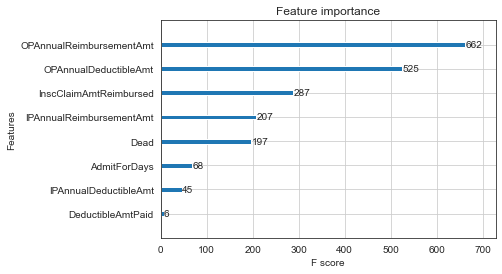

In [97]:
#XGBoost
from xgboost import plot_importance
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
plot_importance(xgb)

In [98]:
import time
start = time.time()
xgb= XGBClassifier()
xgb.fit(x_train, y_train)
xgb_model_score = xgb.predict(x_train)
xgb_pred = xgb.predict(x_val)
end = time.time()
xgb_time = end - start

[23:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_val, xgb_pred)
print(cm)

print("Precision Score:  %.3f " % precision_score(y_val, xgb_pred))
print("Recall Score: %.3f " % recall_score(y_val, xgb_pred))
print("Accuracy: %.3f " % accuracy_score(y_val, xgb_pred))

[[1197   27]
 [  92   37]]
Precision Score:  0.578 
Recall Score: 0.287 
Accuracy: 0.912 


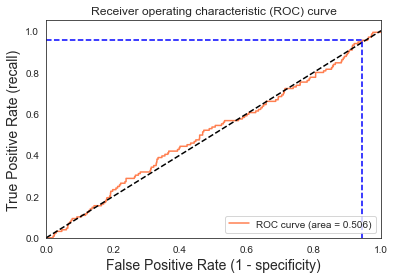

Using a threshold of 0.000 guarantees a sensitivity of 0.953 and a specificity of 0.056, i.e. a false positive rate of 94.36%.


In [100]:
#XGBoost
from sklearn.metrics import roc_curve, auc
[fpr, tpr, thr] = roc_curve(y_val, xgb.predict_proba(x_test)[:,1])


idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

<ipython-input-101-1bae3d912569>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Accuracy Score:  0.8807737325946385


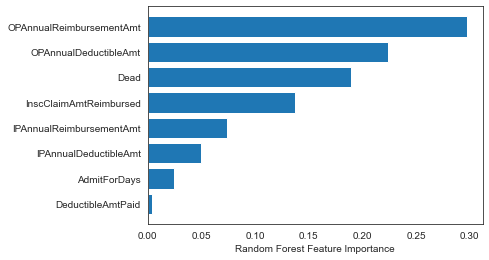

In [101]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf.feature_importances_
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
print('Accuracy Score: ', rf.score(x_train, y_train))

In [102]:
#Random Forest Regressor
start = time.time()
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
rf_model_score= rf.predict(x_train)
rf_pred= rf.predict(x_val)
end = time.time()
rf_time = end - start

<ipython-input-102-326a5ba616fb>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


In [103]:
cm = confusion_matrix(y_val, rf_pred)
print(cm)

print("Precision Score:  %.3f " % precision_score(y_val, rf_pred))
print("Recall Score: %.3f " % recall_score(y_val, rf_pred))
print("Accuracy: %.3f " % accuracy_score(y_val, rf_pred))

[[1199   25]
 [ 100   29]]
Precision Score:  0.537 
Recall Score: 0.225 
Accuracy: 0.908 


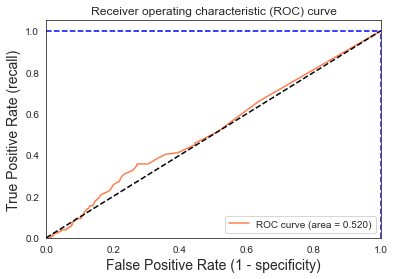

Using a threshold of 0.000 guarantees a sensitivity of 1.000 and a specificity of 0.000, i.e. a false positive rate of 100.00%.


In [104]:
[fpr, tpr, thr] = roc_curve(y_val, rf.predict_proba(x_test)[:,1])

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [105]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
start = time.time()
lr= LogisticRegression()
lr.fit(x_train, y_train)
lr_model_score= lr.predict(x_train)
lr_pred= lr.predict(x_val)
end = time.time()
lr_time = end - start

C:\Users\teren\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\teren\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
cm = confusion_matrix(y_val,lr_pred)
print(cm)

print("Precision Score:  %.3f " % precision_score(y_val, lr_pred))
print("Recall Score: %.3f " % recall_score(y_val, lr_pred))
print("Accuracy: %.3f " % accuracy_score(y_val, lr_pred))

[[1197   27]
 [ 114   15]]
Precision Score:  0.357 
Recall Score: 0.116 
Accuracy: 0.896 


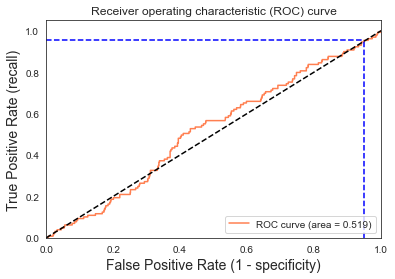

Using a threshold of 0.003 guarantees a sensitivity of 0.953 and a specificity of 0.051, i.e. a false positive rate of 94.93%.


In [107]:
[fpr, tpr, thr] = roc_curve(y_val, lr.predict_proba(x_test)[:,1])

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [108]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
start = time.time()
dt =  DecisionTreeClassifier(criterion= 'gini', max_depth=5, min_samples_split= 2)
fig = dt.fit(x_train, y_train)
dt_model_score= dt.predict(x_train)
dt_pred= dt.predict(x_test)
end = time.time()
dt_time = end - start

In [109]:
cm = confusion_matrix(y_val,dt_pred)
print(cm)

print("Precision Score:  %.3f " % precision_score(y_val, dt_pred))
print("Recall Score: %.3f " % recall_score(y_val, dt_pred))
print("Accuracy: %.3f " % accuracy_score(y_val, dt_pred))

[[1172   52]
 [ 124    5]]
Precision Score:  0.088 
Recall Score: 0.039 
Accuracy: 0.870 


In [110]:
#from sklearn import tree
#plt.figure(figsize=(16,16))
#tree.plot_tree(fig, fontsize=8, feature_names=x_train.columns)
#plt.show()

In [111]:
acc_score = []

In [112]:
#XGBoost Results
acc_score.append({'Model':'XG boost', 
                  'Score': accuracy_score(y_train, xgb_model_score), 
                  'Precision': precision_score(y_val, xgb_pred),
                  'Recall': recall_score(y_val, xgb_pred),
                  'F1 Score': f1_score(y_val,xgb_pred, average='weighted'),
                  'Accuracy': accuracy_score(y_val, xgb_pred),
                  'Time Taken (s)': xgb_time})
#Random Forest Results
acc_score.append({'Model':'Random Forest', 
                  'Score': accuracy_score(y_train, rf_model_score), 
                  'Precision': precision_score(y_val, rf_pred),
                  'Recall': recall_score(y_val, rf_pred), 
                  'F1 Score': f1_score(y_val,rf_pred, average='weighted'),
                  'Accuracy': accuracy_score(y_val, rf_pred),
                  'Time Taken (s)': rf_time})
#Logistic Regrsssion Results
acc_score.append({'Model':'Logistic Regression', 
                  'Score': accuracy_score(y_train, lr_model_score), 
                  'Precision': precision_score(y_val, lr_pred),
                  'Recall': recall_score(y_val, lr_pred), 
                  'F1 Score': f1_score(y_val,lr_pred, average='weighted'),
                  'Accuracy': accuracy_score(y_val, lr_pred),
                  'Time Taken (s)':lr_time})
#Decision Tree Rsults
acc_score.append({'Model':'Decision Tree', 
                  'Score': accuracy_score(y_train, dt_model_score), 
                  'Precision': precision_score(y_val, dt_pred),
                  'Recall': recall_score(y_val, dt_pred), 
                  'F1 Score': f1_score(y_val,dt_pred, average='weighted'),
                  'Accuracy': accuracy_score(y_val, dt_pred),
                  'Time Taken (s)': dt_time})

In [113]:
acc_score = pd.DataFrame(acc_score, columns=['Model','Score','Precision', 'Recall', 'F1 Score' ,'Accuracy', 'Time Taken (s)'])
acc_score.sort_values(by='Accuracy', ascending= False)

,Model,Score,Precision,Recall,F1 Score,Accuracy,Time Taken (s)
0,XG boost,0.969929,0.578125,0.286822,0.898374,0.912047,0.105717
1,Random Forest,0.999261,0.537037,0.224806,0.890054,0.907613,0.320143
2,Logistic Regression,0.908553,0.357143,0.116279,0.871065,0.895787,0.307875
3,Decision Tree,0.925807,0.087719,0.038760,0.846600,0.869919,0.008976


Text(0.5, 1.0, 'Accuracy by Model')

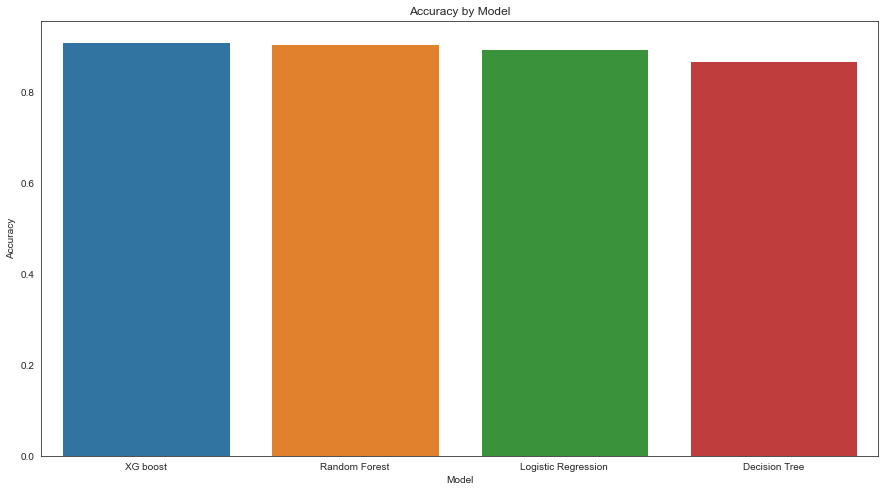

In [114]:
plt.figure(figsize=(15,8))
sns.barplot(x= 'Model', y='Accuracy', data = acc_score, order=acc_score.sort_values('Accuracy',ascending = False).Model).set_title('Accuracy by Model')

In [115]:
Test_Provider_Pred = Test_Provider_Summary[vif_d]

In [116]:
Test_Provider_Pred.head(2)

,AdmitForDays,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,DeductibleAmtPaid,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,Dead
0,0.0,0,0,0.0,1470,360,80,3.0
1,0.0,0,0,0.0,1405,255,80,0.0


In [117]:
Test_Provider_Pred['PotentialFraudPred'] = xgb.predict(Test_Provider_Pred)

<ipython-input-117-5fc9ce32a465>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Provider_Pred['PotentialFraudPred'] = xgb.predict(Test_Provider_Pred)


In [118]:
Test_Provider_Pred = pd.merge(Test, Test_Provider_Pred, how='inner', right_index = True, left_index = True)

In [119]:
Test_Provider_Pred.groupby(['PotentialFraudPred']).size()

PotentialFraudPred
0    1294
1      59
dtype: int64

In [120]:
Test_Provider_Pred.loc[Test_Provider_Pred['PotentialFraudPred'] == 1].head()

,Provider,AdmitForDays,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,DeductibleAmtPaid,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,Dead,PotentialFraudPred
13,PRV51051,0.0,0,0,0.0,1190,320,80,9.0,1
35,PRV51162,0.0,2540,1068,0.0,1045,210,350,1.0,1
86,PRV51407,4.0,9000,1068,1068.0,855,265,6000,2.0,1
129,PRV51648,0.0,3000,1068,0.0,1250,360,200,0.0,1
153,PRV51782,5.0,10000,1068,1068.0,1010,270,6000,0.0,1


In [121]:
Test_Provider_Pred.to_csv('Test_Provider_Prediction.csv', index = False)